In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("C:/Users/acer_pc/Downloads/oakland-crime-statistics-2011-to-2016")
data = pd.read_csv("records-for-2011.csv")

读取数据各属性的基本信息。可看出非空元素个数

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 10 columns):
Agency                       180015 non-null object
Create Time                  180015 non-null object
Location                     180016 non-null object
Area Id                      179112 non-null float64
Beat                         179496 non-null object
Priority                     180015 non-null float64
Incident Type Id             180015 non-null object
Incident Type Description    180015 non-null object
Event Number                 180015 non-null object
Closed Time                  180009 non-null object
dtypes: float64(2), object(8)
memory usage: 13.7+ MB


查看各项数据的独立元素个数

In [4]:
data.nunique()

Agency                            1
Create Time                  179451
Location                      32505
Area Id                           3
Beat                             58
Priority                          3
Incident Type Id                263
Incident Type Description       265
Event Number                 180015
Closed Time                  179506
dtype: int64

打印数据前3行

In [8]:
data.head(3)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000


查看数值类型属性的五数概括

In [10]:
data.describe()

,Area Id,Priority
count,179112.000000,180015.000000
mean,1.740648,1.796111
std,0.746468,0.402916
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


盒图

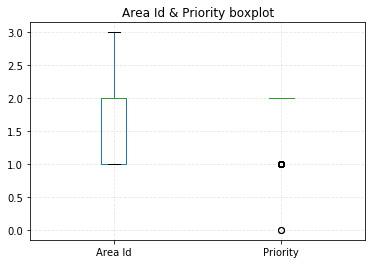

In [15]:
df = pd.DataFrame(data)
df.plot.box(title="Area Id & Priority boxplot")
 
plt.grid(linestyle="--", alpha=0.3)
plt.show()

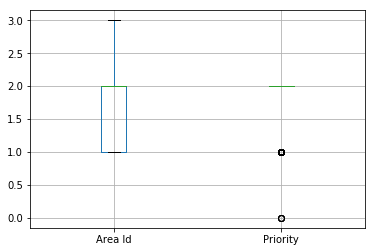

In [18]:
p = data.boxplot(return_type='dict')
x = p['fliers'][0].get_xdata() 
y = p['fliers'][0].get_ydata()
y.sort()


for i in range(len(x)): 
  if i > 0:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
  else:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show() 


数据可视化（柱状图）

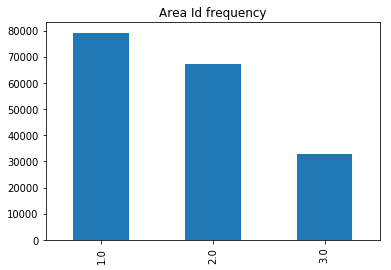

In [18]:
df['Area Id'].value_counts().plot.bar()
plt.title("Area Id frequency")
plt.show()

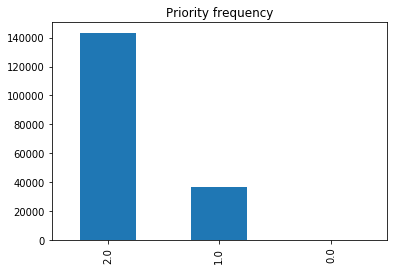

In [19]:
df['Priority'].value_counts().plot.bar()
plt.title("Priority frequency")
plt.show()

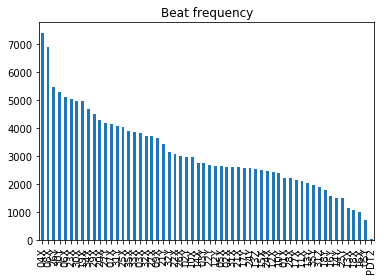

In [16]:
# Non-numerical data <Beat>
df['Beat'].value_counts().plot.bar()
plt.title("Beat frequency")
plt.show()

分别对缺失数据进行丢弃、众数填补、基于属性间相关度填补、基于属性内信息填补

In [39]:
# NaN data processing
p1 = df.dropna() #drop 
Pri_mode = df['Priority'].value_counts().index.tolist()[0]
Area_mode = df['Area Id'].value_counts().index.tolist()[0]
Beat_mode = df['Beat'].value_counts().index.tolist()[0]
modes = {'Area Id':Area_mode,'Priority':Pri_mode,'Beat':Beat_mode }
p2 = df.fillna(value=modes)


{'Area Id': 1.0, 'Priority': 2.0, 'Beat': '04X'}


In [75]:
p3 = df.copy()
null_pos = df['Area Id'][df['Area Id'].isnull().values==True].index.tolist()
for idx in null_pos[:-1]:
    location = df['Location'].tolist()[idx]
    values = df['Area Id'][df.Location==location].value_counts().index.tolist()
    if values==[]:
        value = 0
    else:
        value = values[0]
    p3['Area Id'][idx] = value
    


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [76]:
p3['Beat'] = p3['Beat'].fillna(method="ffill")

缺失数据处理结果与原始数据可视化对比

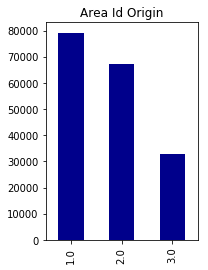

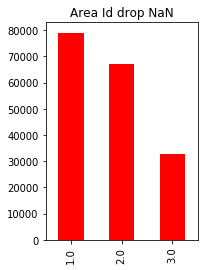

In [130]:
# compare1
plt.subplot(121)
ax=df['Area Id'].value_counts().plot.bar(color='DarkBlue')
plt.title("Area Id Origin")
plt.show()

plt.subplot(122)
bx = p1['Area Id'].value_counts().plot.bar(color='Red')
plt.title("Area Id drop NaN")
plt.show()

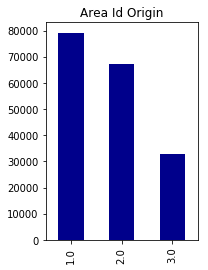

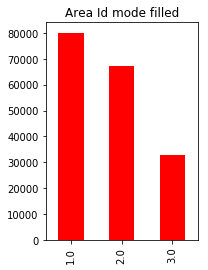

In [125]:
# compare2
plt.subplot(121)
ax=df['Area Id'].value_counts().plot.bar(color='DarkBlue')
plt.title("Area Id Origin")
plt.show()

plt.subplot(122)
bx = p2['Area Id'].value_counts().plot.bar(color='Red')
plt.title("Area Id mode filled")
plt.show()

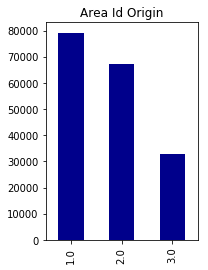

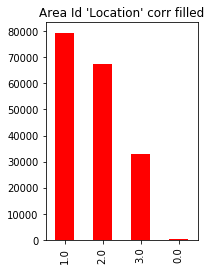

In [126]:
# compare3
plt.subplot(121)
ax=df['Area Id'].value_counts().plot.bar(color='DarkBlue')
plt.title("Area Id Origin")
plt.show()

plt.subplot(122)
bx = p3['Area Id'].value_counts().plot.bar(color='Red')
plt.title("Area Id 'Location' corr filled")
plt.show()

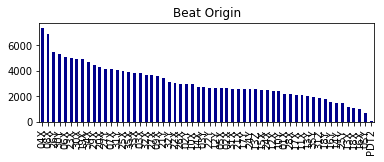

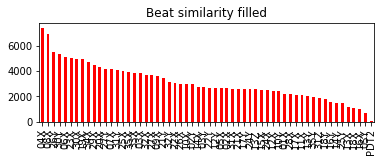

In [129]:
# compare4
plt.subplot(211)
ax=df['Beat'].value_counts().plot.bar(color='DarkBlue')
plt.title("Beat Origin")
plt.show()

plt.subplot(212)
bx = p3['Beat'].value_counts().plot.bar(color='Red')
plt.title("Beat similarity filled")
plt.show()